<a href="https://colab.research.google.com/github/ahmadSum1/MIR_Machine_Learning_PARIS_Sebastien/blob/dev_ex02/MIRs1_ML_Exercice2_KCV_and_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [623]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'google.colab' in str(get_ipython()):
  from google.colab import files
  import io
else:
  print('Not running on CoLab')

data_file = 'ionosphere_data.csv'
df = pd.read_csv('ionosphere_data.csv')
# uploaded = files.upload() #Si google colab
# df = pd.read_csv(io.BytesIO(uploaded[data_file]))

In [624]:
# df

Since the columns b has no variance, it must be removed by:

In [625]:
df.drop(columns=['column_b'], inplace=True)
# df

The column_a with boolean must be encoded into 0/1 values by::

In [626]:
df['column_a'] = df.column_a.astype('float64')
# df

Labels must be extracted from the df object via:

In [627]:
df.rename(columns={'column_ai': 'label'}, inplace=True)
df['label'] = df.label.astype('category')
encoding = {'g': 1, 'b': 0}
df.label.replace(encoding, inplace=True)

Finally data are obtained via:

In [628]:
X = df.values[:, :-1]
y = df.values[:, -1]

In [629]:
print(X.shape)
print(y.shape)

(351, 33)
(351,)


In [630]:
def my_train_test_idx(X,y,K,train_size):
  N = X.shape[0]
  Ntrain = int(N* train_size)
  Ntest = N-Ntrain
  Itrain = np.zeros((Ntrain,K), dtype=int)
  Itest =  np.zeros((Ntest, K), dtype=int)
  for k in range(K):
    idxs = np.random.permutation(N)
    split_h_idx = Ntrain                          # integer for line selection (horizontal selection)
    train_idxs = idxs[ :split_h_idx]              # indexing/selection of the test %
    test_idxs = idxs[split_h_idx : ]              # indexing/selection of the remaining % for training
    # print(test_idxs)
    Itrain[:,k] = train_idxs
    Itest[:,k] = test_idxs
  return Itrain, Itest

In [631]:
Itrain, Itest = my_train_test_idx(X,y,10,0.6)

# Xtrain = X[Itrain[: , 1],:]
# ytrain = y[Itrain[: , 1]]
# Xtest = X[Itest[: , 1],:]
# ytest = y[Itest[: , 1]]

In [632]:
# Xtest

**ii)  kNN classifier**

In [633]:
def kNN(X, y, K, train_size):
  Itrain, Itest = my_train_test_idx(X,y,K,train_size)
  error = np.zeros(K)
  for i in range(K):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    Xtrain = X[Itrain[: , i],:]
    ytrain = y[Itrain[: , i]] 
    Xtest = X[Itest[: , i],:]
    ytest = y[Itest[: , i]]
    #Train the model using the training sets
    knn.fit(Xtrain, ytrain)
    #Predict the response for test dataset
    ypred = knn.predict(Xtest)
    # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
    error[i]= mean_absolute_error(ytest, ypred)
  mean_error = error.mean()
  std_error = np.std(error)
  print ("Mean error over K fold:",mean_error)
  print ("STD of error over K fold:",std_error)

In [634]:
kNN(X, y, 10, 0.6)

Mean error over K fold: 0.16950354609929077
STD of error over K fold: 0.029319186678857283


**iii)**

In [635]:
def my_train_test_valid_idx(X,y,K,train_size,valid_size):
  N = X.shape[0]
  # Ntrain + Nvalid + Ntest = N,
  # Itrain(Ntrain x K), Ivalid(Nvalid x K) and Itest(Ntest x K).
  Ntrain = int(N* train_size)
  Nvalid = int((N-Ntrain)* train_size)
  Ntest = N - Ntrain - Nvalid
  
  Itrain = np.zeros( (Ntrain,K), dtype=int)
  Ivalid = np.zeros( (Nvalid,K), dtype=int)
  Itest  = np.zeros( (Ntest, K), dtype=int)
  for k in range(K):
    idxs = np.random.permutation(N)
    split_h_idx1 = Ntrain
    split_h_idx2 = Ntrain+Nvalid                          # integer for line selection (horizontal selection)
    train_idxs = idxs[ :split_h_idx1]                      # indexing/selection of the test %
    valid_idxs = idxs[split_h_idx1 : split_h_idx2 ]        # indexing/selection of the % for validation
    test_idxs = idxs[split_h_idx2 : ]                     # indexing/selection of the remaining % for training
    # print(test_idxs)
    Itrain[:,k] = train_idxs
    Ivalid[:,k] = valid_idxs
    Itest[:,k]  = test_idxs
  return Itrain, Ivalid, Itest


In [636]:
Itrain, Ivalid, Itest = my_train_test_valid_idx(X,y,1,0.6,0.2)
Xtrain = X[Itrain[: , 0],:]
ytrain = y[Itrain[: , 0]] 
Xvalid = X[Ivalid[: , 0],:]
yvalid = y[Ivalid[: , 0]]
Xtest = X[Itest[: , 0],:]
ytest = y[Itest[: , 0]]

In [637]:
def kNN2(X, y, train_size, valid_size, k):
  Itrain, Ivalid, Itest = my_train_test_valid_idx(X,y,1,train_size, valid_size)
  ER_valid = np.zeros(k)
  
  Xtrain = X[Itrain[: , 0],:]
  ytrain = y[Itrain[: , 0]] 
  Xvalid = X[Ivalid[: , 0],:]
  yvalid = y[Ivalid[: , 0]]
  Xtest  = X[Itest[: , 0],:]
  ytest  = y[Itest[: , 0]]

  for i in range(k):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i+1)
    
    #Train the model using the training sets
    knn.fit(Xtrain, ytrain)
    #Predict the response for test dataset
    ypred = knn.predict(Xvalid)
    # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
    ER_valid[i]= mean_absolute_error(yvalid, ypred)

  print ("ER_valids: ",ER_valid)
  target_k = np.argmin(ER_valid)+1
   
  Xk = np.concatenate((Xtrain, Xvalid), axis=0)
  yk = np.concatenate((ytrain, yvalid), axis=0)

  knn = KNeighborsClassifier(n_neighbors=target_k)

  knn.fit(Xk, yk)
  #Predict the response for test dataset
  ypred = knn.predict(Xtest)
  # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
  ER_test = mean_absolute_error(ytest, ypred)

  print("value of k minimizing ER_valid(k):", target_k)
  print("ER_test", ER_test)

In [638]:
kNN2(X, y, 0.6, 0.2, 20)

ER_valids:  [0.13095238 0.0952381  0.1547619  0.11904762 0.14285714 0.13095238
 0.1547619  0.1547619  0.1547619  0.14285714 0.16666667 0.16666667
 0.16666667 0.17857143 0.17857143 0.17857143 0.19047619 0.17857143
 0.17857143 0.17857143]
value of k minimizing ER_valid(k): 2
ER_test 0.14035087719298245


**iv) SVM classifier.**
 Please add in your header: from sklearn.svm import SVC.

a) Create the svm oject via the SVC method with a RBF Kernel. Select the \gamma et C parameters to 1.0 and 1.0 respectively

In [639]:
clf = SVC(kernel='rbf', gamma=1.0, C=1.0)

b) For each K-fold, learn the model (on Xtrain,ytrain) and predict class with the fit and predict methods respectively. Compute the mean Error Rate (and its standard deviation) integrated over the K = 10 folds

**N.B.** For the svm classifier, the parameter \theta represents all lagrange'multipliers.

In [640]:
def SVM(X, y, K, train_size, gamma, C):
  Itrain, Itest = my_train_test_idx(X,y,K,train_size)
  error = np.zeros(K)
  for i in range(K):
    #Create SVC Classifier
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    Xtrain = X[Itrain[: , i],:]
    ytrain = y[Itrain[: , i]] 
    Xtest = X[Itest[: , i],:]
    ytest = y[Itest[: , i]]
    #Train the model using the training sets
    svm.fit(Xtrain, ytrain)
    #Predict the response for test dataset
    ypred = svm.predict(Xtest)
    # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
    error[i]= mean_absolute_error(ytest, ypred)
  mean_error = error.mean()
  std_error = np.std(error)
  print ("Mean error over K folds:",mean_error)
  print ("STD of error over K folds:",std_error)

In [641]:
SVM(X, y, 10, 0.6, gamma=1.0, C=1.0)

Mean error over K folds: 0.0801418439716312
STD of error over K folds: 0.024578331136402065


**v)** Model selection for gamma and C. Like in iii), generate three sets (with K=1) Itrain, Itest, Ivald.

For different couples (gamma,C), point of a 2d grid,, compute ER_valid. You can build the mesh grid for gamma=0.01,0.1,...100 and C = 0.01, 0.1, ...,10000. Select the best (gamma,C) minimizing ER_valid.  Predict ER_test by concanating Xtrain with Xvalid and ytrain with yvalid respectively

In [642]:
Itrain, Ivalid, Itest = my_train_test_valid_idx(X,y,1,0.6,0.2)
Xtrain = X[Itrain[: , 0],:]
ytrain = y[Itrain[: , 0]] 
Xvalid = X[Ivalid[: , 0],:]
yvalid = y[Ivalid[: , 0]]
Xtest = X[Itest[: , 0],:]
ytest = y[Itest[: , 0]]

In [643]:
def SVM2(X, y, train_size, valid_size, gamma, C):
  Itrain, Ivalid, Itest = my_train_test_valid_idx(X,y,1,train_size, valid_size)
  gamma_C = np.array(np.meshgrid(gamma,C)).T.reshape(-1,2)
  # print(gamma_C.shape)
  # print(gamma_C)
  ER_valid = np.zeros(gamma_C.shape[0])
  
  Xtrain = X[Itrain[: , 0],:]
  ytrain = y[Itrain[: , 0]] 
  Xvalid = X[Ivalid[: , 0],:]
  yvalid = y[Ivalid[: , 0]]
  Xtest  = X[Itest[: , 0],:]
  ytest  = y[Itest[: , 0]]

  for i in range(gamma_C.shape[0]):
    g, c = gamma_C[i,0], gamma_C[i,1]
    # print(f"g:{g}, C:{c}")
    #Create SVC Classifier
    svm = SVC(kernel='rbf', gamma=g, C=c)
    #Train the model using the training sets
    svm.fit(Xtrain, ytrain)
    #Predict the response for test dataset
    ypred = svm.predict(Xvalid)
    # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
    ER_valid[i]= mean_absolute_error(yvalid, ypred)

  print ("ER_valids: ",ER_valid)
  target_k = np.argmin(ER_valid)
   
  Xk = np.concatenate((Xtrain, Xvalid), axis=0)
  yk = np.concatenate((ytrain, yvalid), axis=0)
  g, c = gamma_C[target_k,0], gamma_C[target_k,1]
  print(f"g:{g}, C:{c}")
  svm = SVC(kernel='rbf', gamma=g, C=c)

  svm.fit(Xk, yk)
  #Predict the response for test dataset
  ypred = svm.predict(Xtest)
  # print("Accuracy of K=",i,": ",metrics.accuracy_score(ytest, ypred))
  ER_test = mean_absolute_error(ytest, ypred)

  print("ER_test", ER_test)
  return svm, ER_valid

In [644]:
gamma =[0.01,0.1, 1.0, 10.0, 100.0]
C     =[0.01,0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
model, ER_valid = SVM2(X, y, 0.6, 0.2, gamma, C)

ER_valids:  [0.4047619  0.4047619  0.10714286 0.07142857 0.07142857 0.05952381
 0.13095238 0.4047619  0.25       0.04761905 0.07142857 0.07142857
 0.08333333 0.08333333 0.4047619  0.4047619  0.07142857 0.07142857
 0.07142857 0.07142857 0.07142857 0.4047619  0.4047619  0.39285714
 0.39285714 0.39285714 0.39285714 0.39285714 0.4047619  0.4047619
 0.4047619  0.4047619  0.4047619  0.4047619  0.4047619 ]
g:0.1, C:1.0
ER_test 0.07017543859649122


In [645]:
err = ER_valid.reshape((5,7))

In [654]:
#using external library for heat mapping
# ax = sns.heatmap(err, linewidth=0,  cmap="viridis")
# plt.xlabel('C values')
# plt.ylabel('gamma values')
# plt.xticks(range(len(C)),C)
# plt.yticks(range(len(gamma)),gamma)
# plt.gca().invert_yaxis()

# plt.show()

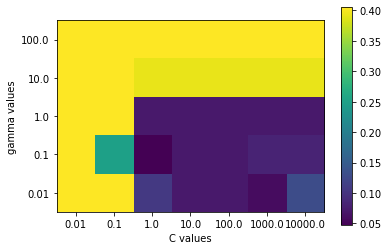

In [658]:
#printing using just pyplot
plt.figure()
plt.subplot()
plt.imshow(err, cmap='viridis')
plt.colorbar()
plt.xlabel('C values')
plt.ylabel('gamma values')
plt.xticks(range(len(C)),C)
plt.yticks(range(len(gamma)),gamma)
plt.gca().invert_yaxis()
plt.show()

In [648]:
g = model.get_params()['gamma']
c = model.get_params()['C']
SVM(X, y, 10, 0.6, g, c)

Mean error over K folds: 0.053900709219858144
STD of error over K folds: 0.022020105952141877
